In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df=pd.read_csv('insurance.csv')
df.head(10)


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


In [139]:
df.shape

(1338, 7)

In [140]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
age,1338.0,NaN,NaN,NaN,39.207025,14.04996,18.0,27.0,39.0,51.0,64.0
sex,1338,2,male,676,NaN,NaN,NaN,NaN,NaN,NaN,NaN
bmi,1338.0,NaN,NaN,NaN,30.663397,6.098187,15.96,26.29625,30.4,34.69375,53.13
children,1338.0,NaN,NaN,NaN,1.094918,1.205493,0.0,0.0,1.0,2.0,5.0
smoker,1338,2,no,1064,NaN,NaN,NaN,NaN,NaN,NaN,NaN
region,1338,4,southeast,364,NaN,NaN,NaN,NaN,NaN,NaN,NaN
charges,1338.0,NaN,NaN,NaN,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


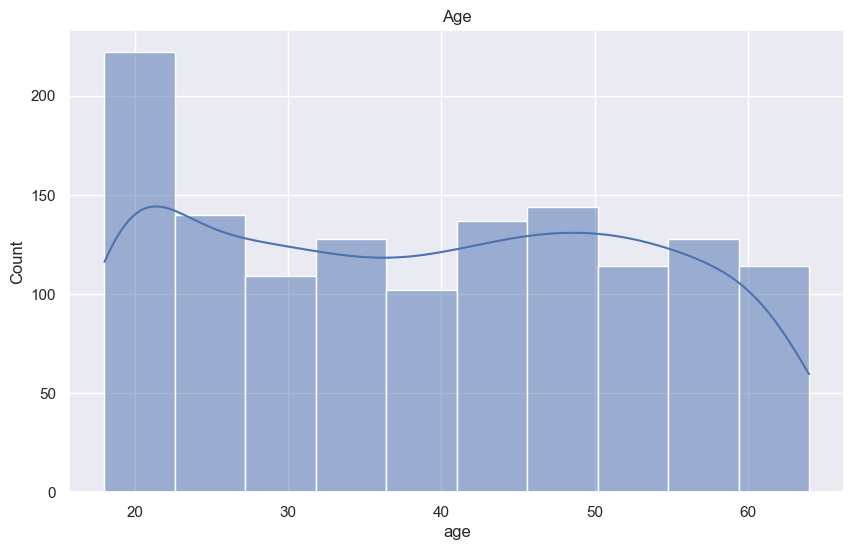

In [141]:
plt.figure(figsize=(10,6))
sns.histplot(df['age'],kde=True,bins=10)
plt.title('Age')
plt.show()

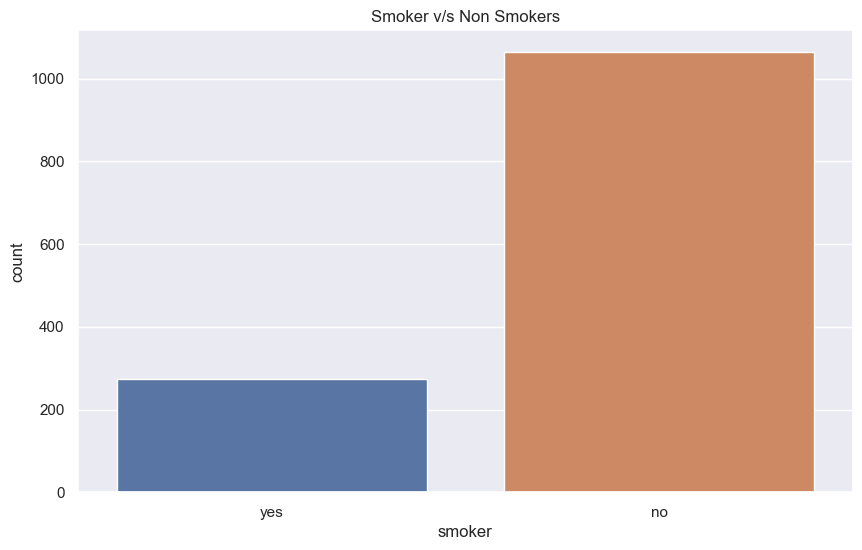

In [142]:
plt.figure(figsize=(10,6))
sns.countplot(data=df,x='smoker', hue="smoker")
plt.title('Smoker v/s Non Smokers')
plt.show()

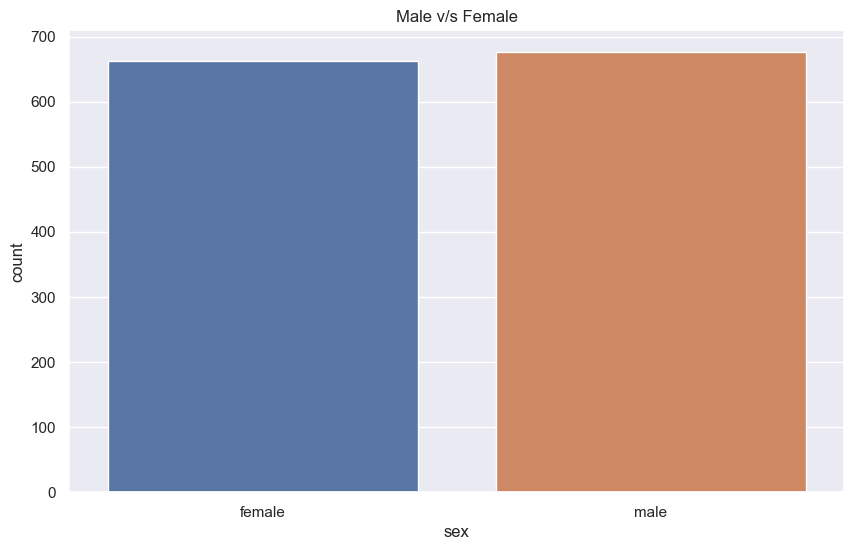

In [143]:
plt.figure(figsize=(10,6))
sns.countplot(data=df,x='sex', hue="sex")
plt.title('Male v/s Female')
plt.show()

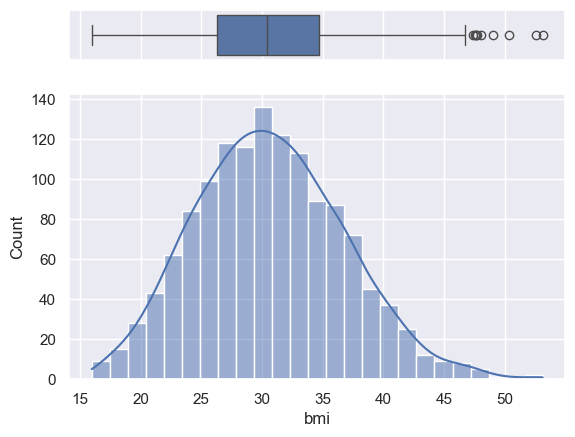

In [144]:
sns.set(style="darkgrid")
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})
sns.boxplot(data=df,x='bmi', ax=ax_box)
sns.histplot(data=df, x="bmi", ax=ax_hist,kde=True)
ax_box.set(xlabel='')
plt.show()

<h2>Threating Outliers </h2>

In [145]:
Q3 = df['bmi'].quantile(0.75)
Q1 = df['bmi'].quantile(0.25)
IQR = Q3-Q1

upper = Q3+(1.5*IQR)
lower = Q1-(1.5*IQR)

data = df[(df['bmi']>lower) & (df['bmi']<upper)]

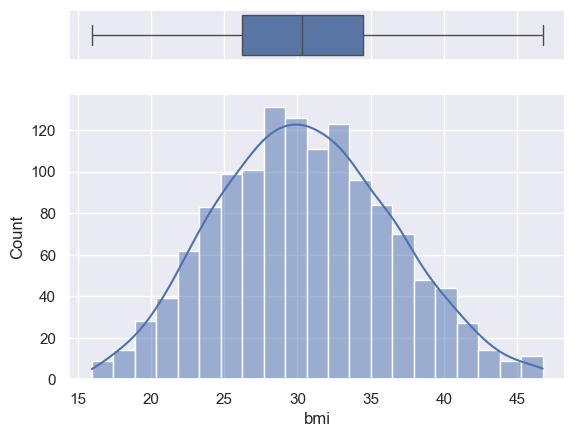

In [146]:
sns.set(style="darkgrid")
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})
sns.boxplot(data=data,x='bmi', ax=ax_box)
sns.histplot(data=data, x="bmi", ax=ax_hist,kde=True)
ax_box.set(xlabel='')
plt.show()

From the above graph, we can say:
- Avg BMI is around 30
- 75% of BMI is under 33
- 25% of BMI is less the 26

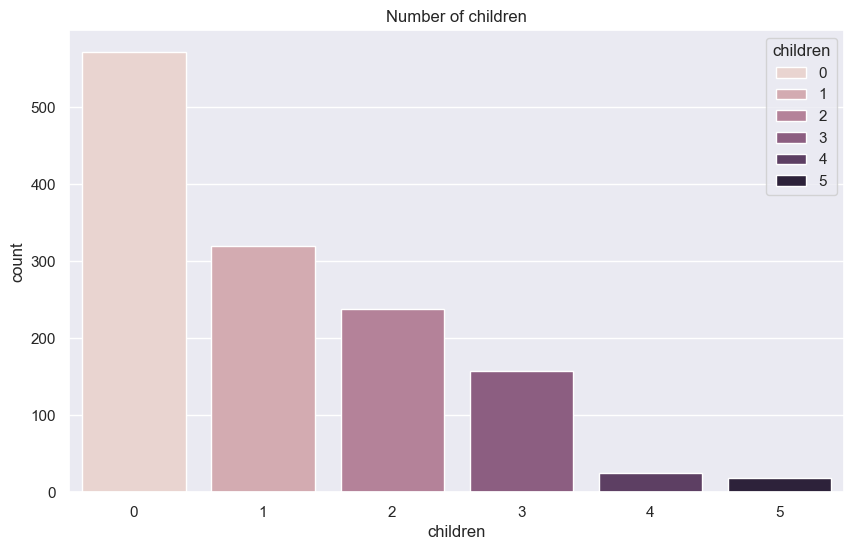

In [147]:
plt.figure(figsize=(10,6))
sns.countplot(data = data,x='children', hue="children")
plt.title('Number of children')
plt.show()

From the above graphs, we can say 
- Number of children 0,1,2,3 are more common
- Number of children 4 and 5 are almost equal and rare.

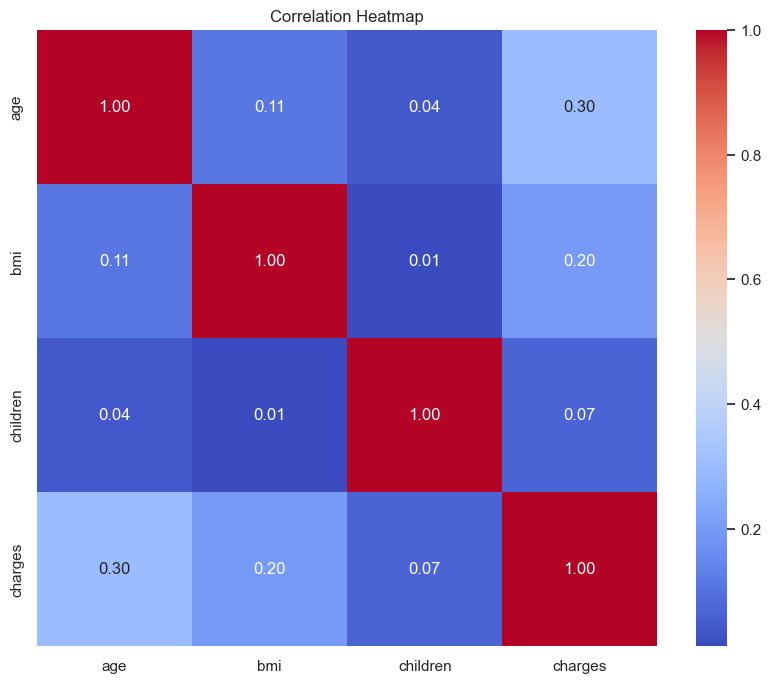

In [148]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.select_dtypes(include='number').corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

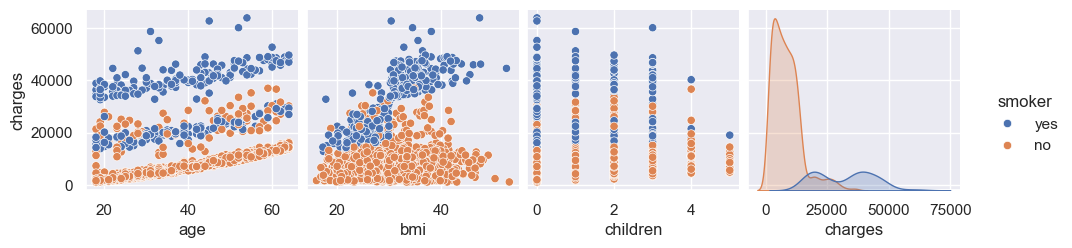

In [149]:
sns.pairplot(df,hue='smoker',y_vars=['charges'])
plt.show()